In [2]:
import numpy as np 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

import seaborn as sns

In [4]:
dataset =  load_dataset("imdb")
train_data = dataset['train']
test_data = dataset['test']

train_data[0]

Generating unsupervised split: 100%|██████████| 50000/50000 [00:00<00:00, 370501.92 examples/s]


{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

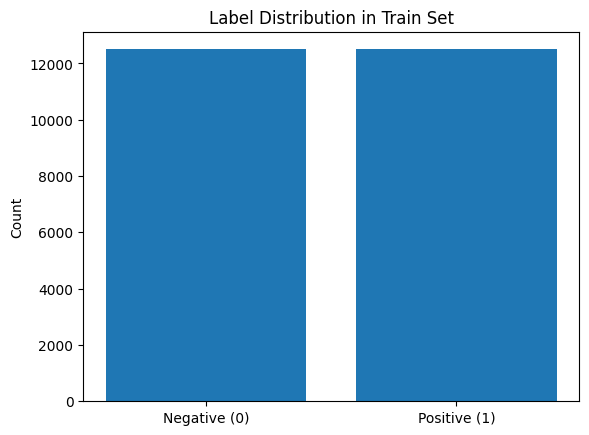

In [5]:
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
label_counts = train_df["label"].value_counts().sort_index()

plt.bar(["Negative (0)", "Positive (1)"], label_counts)
plt.title("Label Distribution in Train Set")
plt.ylabel("Count")
plt.show()

In [9]:
print ("Sample Review : /n")
print(train_df["text"][])
print ("/nSentiment : ", "Positive" if  train_df["label"][0] == 1 else "Negative") 

Sample Review : /n
Terrible movie. Nuff Said.<br /><br />These Lines are Just Filler. The movie was bad. Why I have to expand on that I don't know. This is already a waste of my time. I just wanted to warn others. Avoid this movie. The acting sucks and the writing is just moronic. Bad in every way. The only nice thing about the movie are Deniz Akkaya's breasts. Even that was ruined though by a terrible and unneeded rape scene. The movie is a poorly contrived and totally unbelievable piece of garbage.<br /><br />OK now I am just going to rag on IMDb for this stupid rule of 10 lines of text minimum. First I waste my time watching this offal. Then feeling compelled to warn others I create an account with IMDb only to discover that I have to write a friggen essay on the film just to express how bad I think it is. Totally unnecessary.
/nSentiment :  Negative


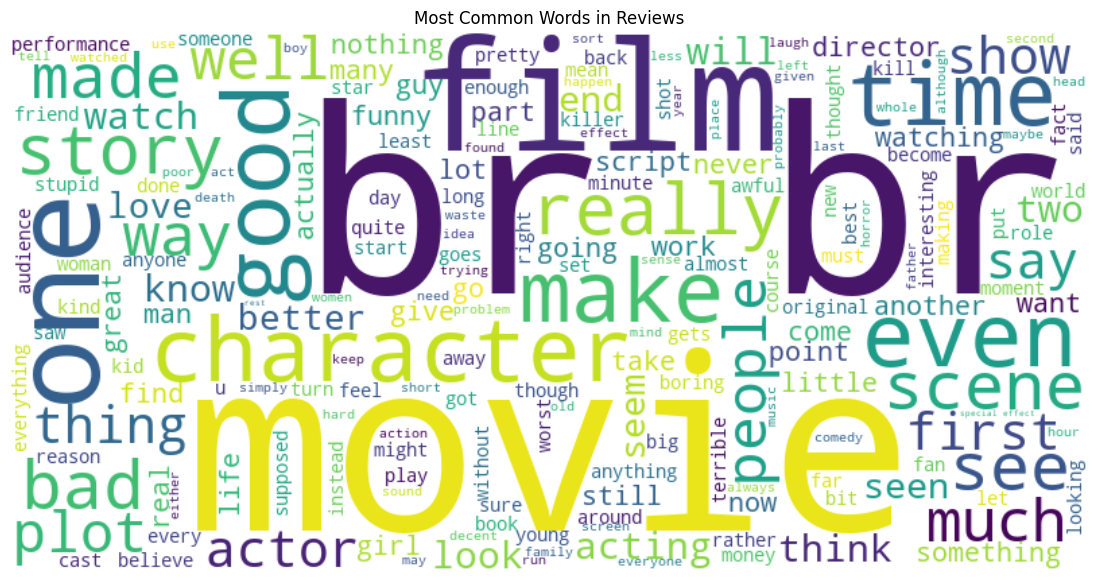

In [11]:
# Cell 7: Generate a word cloud (optional EDA)
all_text = " ".join(train_df["text"][:1000])  # Limit to 1000 samples for speed
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()
